# Tree based methods

In [1]:
%matplotlib inline
from pylab import *
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

## Arbres décisionnels CART 

> Télécharger [les donnnées Spam](https://archive.ics.uci.edu/ml/datasets/spambase) depuis la plateforme UCI. Importer les données sous python, par exemple en utilisant pandas. Donner son label à chaque variable. La variable cible $Y$ qui indique la présence d'un spam est en dernière position dans la base de données. Créer deux tableaux numpy X_Spam and Y_Spam pour ce problème de classification.

#### Importation du nom des variables depuis "spambase.names"

Le fichier des noms de variables (prêt à l'emploi, pour vous faire gagner du temps) est disponible [ici](https://box.ec-nantes.fr:443/index.php/s/5SZxSp5ZSFEeGZR).

In [2]:
file_path=  "spambase/"
data_path = file_path + "spambase.names"

features_names = pd.read_csv(data_path, delim_whitespace=True,header=None)
#print(features_names.values[:,0])

#### Importation de la table de données au format pandas

In [3]:
data_path = file_path + "spambase.data"
Spam_data = pd.read_csv(data_path)

In [4]:
print(Spam_data.shape)
print(Spam_data.head())

(4600, 58)
      0  0.64  0.64.1  0.1  0.32   0.2   0.3   0.4   0.5   0.6  ...  0.41  \
0  0.21  0.28    0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
1  0.06  0.00    0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
2  0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
3  0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00    0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...  0.00   

    0.42  0.43  0.778   0.44   0.45  3.756   61   278  1  
0  0.132   0.0  0.372  0.180  0.048  5.114  101  1028  1  
1  0.143   0.0  0.276  0.184  0.010  9.821  485  2259  1  
2  0.137   0.0  0.137  0.000  0.000  3.537   40   191  1  
3  0.135   0.0  0.135  0.000  0.000  3.537   40   191  1  
4  0.223   0.0  0.000  0.000  0.000  3.000   15    54  1  

[5 rows x 58 columns]


In [5]:
Spam_data.describe()  # le summary de pandas

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
X_Spam = Spam_data.values[:,0:57]
Y_Spam = Spam_data.values[:,57]

Y_Spam

array([1., 1., 1., ..., 0., 0., 0.])

> Ajuster un arbre de classification sur les données Spam avec la fonction [tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/tree.html#classification) (lire la documentation de cette fonction).

In [7]:
from sklearn import tree
max_leaf_nodes = 5
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 5)
clf_fit = clf.fit(X_Spam, Y_Spam)

> Représenter l'arbre de classification avec 5 noeuds terminaux (`max_leaf_nodes`)  à l'aide de la fonction `tree.plot_tree`.

[Text(0.5555555555555556, 0.875, 'x[52] <= 0.056\ngini = 0.477\nsamples = 4600\nvalue = [2788, 1812]'),
 Text(0.3333333333333333, 0.625, 'x[6] <= 0.055\ngini = 0.359\nsamples = 3470\nvalue = [2655, 815]'),
 Text(0.2222222222222222, 0.375, 'x[51] <= 0.378\ngini = 0.274\nsamples = 3140\nvalue = [2625, 515]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.181\nsamples = 2737\nvalue = [2462, 275]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.482\nsamples = 403\nvalue = [163, 240]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.165\nsamples = 330\nvalue = [30, 300]'),
 Text(0.7777777777777778, 0.625, 'x[24] <= 0.4\ngini = 0.208\nsamples = 1130\nvalue = [133, 997]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.123\nsamples = 1060\nvalue = [70, 990]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.18\nsamples = 70\nvalue = [63, 7]')]

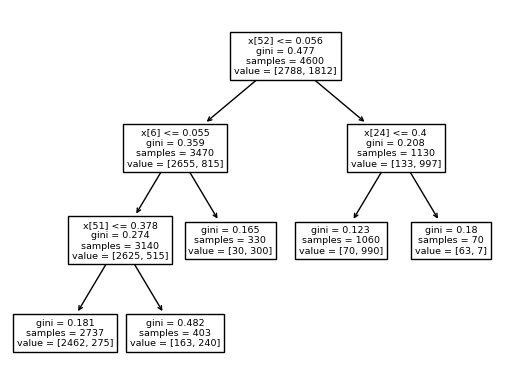

In [8]:
tree.plot_tree(clf)

> Comparer les performances de l'arbre de classification pour plusieurs choix de nombre maximal de noeuds (`max_leaf_nodes=`). Utiliser une procédure 5-folds avec la fonction `GridSearchCV` pour évaluer  et comparer les erreurs de généralisation. Pensez à imposer une permutation aléatoire des blocs.

In [9]:
from sklearn import model_selection
maxnodes = [2,4,6,8,10,15,20,30,50,100,200,300,400,500,800]
my_fold = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
grid_parameters = {"max_leaf_nodes": maxnodes}
Cart_grid = model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(),
                                           param_grid=grid_parameters,
                                           cv=my_fold)

Cart_grid.fit(X_Spam, Y_Spam)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 4, 6, 8, 10, 15, 20, 30, 50, 100,
                                            200, 300, 400, 500, 800]})

> Si on appelle `Cart_grid` le résultat de `GridSearchCV`, le détail des scores obtenus sur la grille de paramètres pour chacun des folds est disponible dans le dictionnaire `Cart_grid.cv_results_`.    
> - Afficher l'ensemble des attributs de `Cart_grid.cv_results_`.    
> - Extraire du résultat de gridsearchCV le vecteur des scores moyens obtenus par la procédure 5 folds pour chaque paramètre choisi (attribut `mean_test_score`).  
> - Representer le score (moyen) en fonction du nombre de noeuds terminaux. 

In [10]:
Cart_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_leaf_nodes', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [11]:
mean_test_score = Cart_grid.cv_results_['mean_test_score']
print(mean_test_score)

[0.785      0.85543478 0.88369565 0.89173913 0.89565217 0.90543478
 0.90913043 0.9123913  0.9173913  0.91978261 0.91673913 0.90543478
 0.91130435 0.90673913 0.90891304]


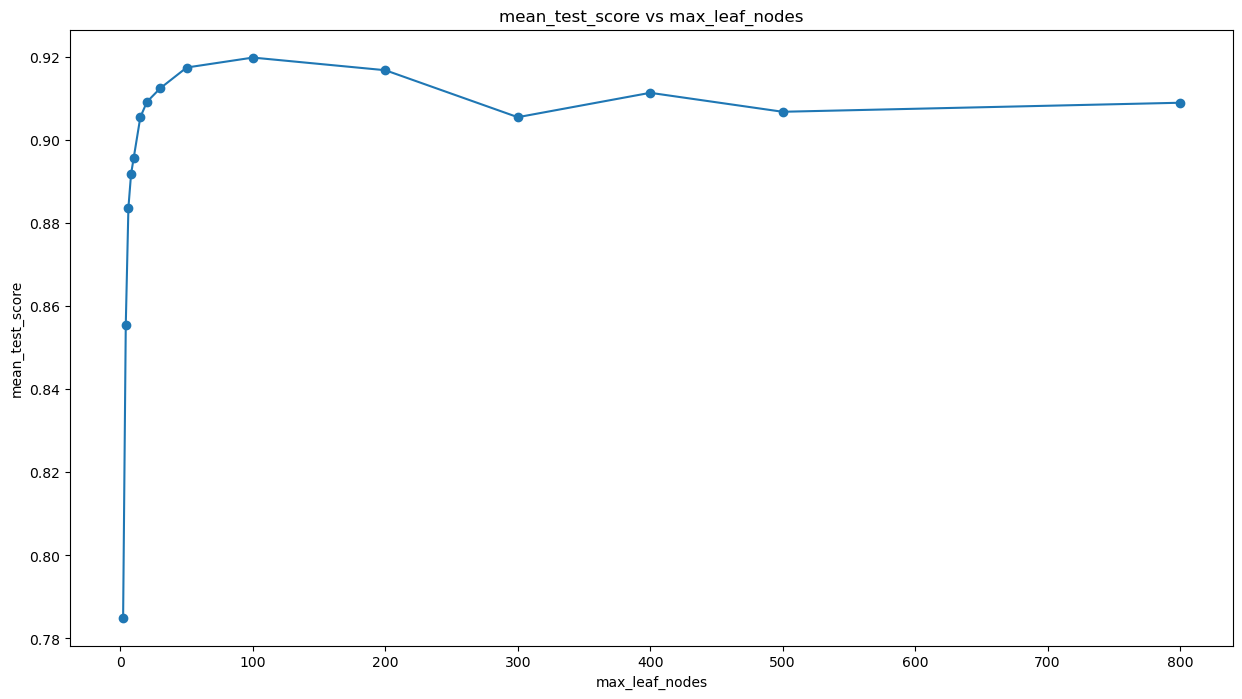

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(maxnodes, mean_test_score, 'o-')
plt.xlabel('max_leaf_nodes')
plt.ylabel('mean_test_score')
plt.title('mean_test_score vs max_leaf_nodes')
plt.show()

Les performances sont très bonnes car le problème est assez facile mais on observe quand même l'effet du sur-apprentissage pour les arbres les plus developpés. 

> Illustrer l'instabilité des arbres CART sur des arbres de petites tailles (prendre par exemple `max_leaf_nodes=6`). On pourra tirer des échantillons aléatoirement avec remise dans les données initiales (précédure bootstrap) en utilisant la fonction [`resample`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) et comparer finalement (graphiquement) les arbres de décision ainsi ajustés.

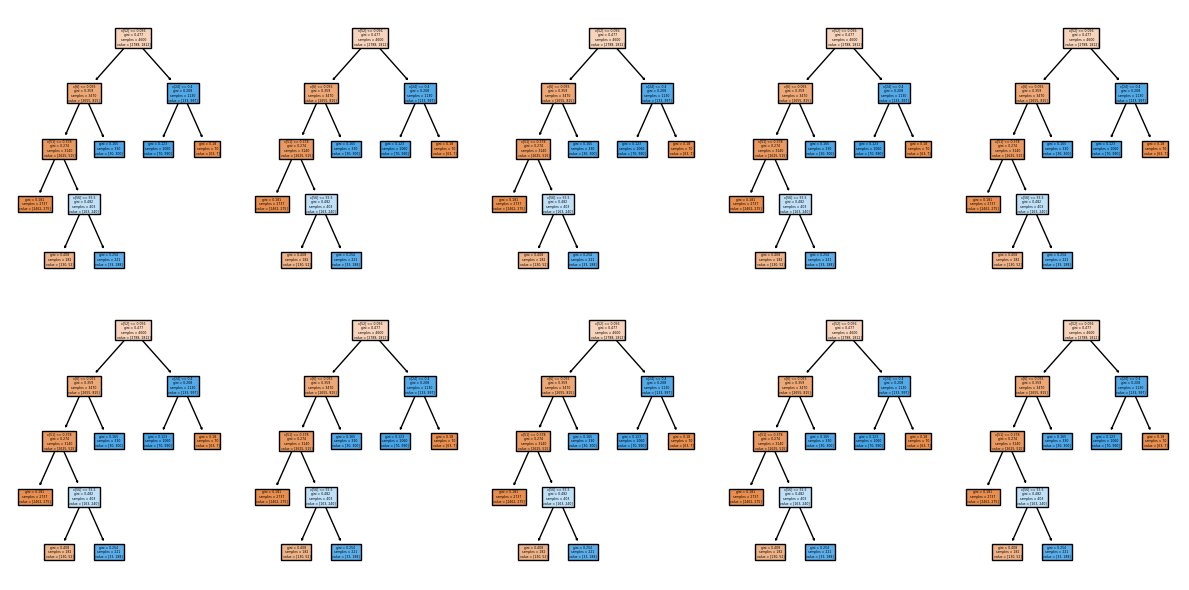

In [13]:
from sklearn.utils import resample
from sklearn import tree

max_leaf_nodes = 6
n_samples = len(X_Spam)
trees = []
iteration = 10
for _ in range(iteration):
    X_sample, Y_sample = resample(X_Spam, Y_Spam, replace=True, n_samples=n_samples, random_state=0,)
    Cart_max6 = tree.DecisionTreeClassifier(max_leaf_nodes=6)
    Cart_max6.fit(X_Spam, Y_Spam)
    trees.append(Cart_max6)

plt.figure(figsize=(12, 6))
for i, tree_i in enumerate(trees):
    plt.subplot(2, 5, i+1)
    plt.title(f"Tree {i + 1}")
    tree.plot_tree(tree_i, filled=True)
plt.tight_layout()
plt.show()

## Bagged Trees

On importe maintenant les données `housing`  depuis `sckit-learn` (voir description plus bas du jeu de données) :

In [14]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
from sklearn.tree import DecisionTreeRegressor

In [15]:
X_housing = housing.data
y_housing = housing.target

In [16]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

> Séparer les données en deux échantillons apprentissage et test (80% - 20%).

In [17]:
X_housing_train, X_housing_test, y_housing_train, y_housing_test = model_selection.train_test_split(X_housing, y_housing, test_size=0.2, random_state=0)


Avec sckit-learn, les performances en régression sont évaluées par défaut via le score du $R^2$ (coefficient d'ajustement ou coefficient de détermination). Ce score donne une mesure de la qualité de la prédiction :

$$
R^{2}=1- \frac {\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}} = 1- \frac { \frac 1n \sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{ var (Y)}. 
$$
Un ajustement parfait correspond évidemment à $R^2 = 1$. 

On reconnait un terme d'erreur quadratique au numérateur. On peut bien sûr calculer le score sur l'échantillon d'apprentissage ou sur l'échantillon test.

> Construire un bagged tree en utilisant la fonction `BaggingRegressor()` (voir [ici](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)), avec 20 arbres. Calculer la prédiction sur l'échantillon test et le score associé. 

In [18]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
base_tree = DecisionTreeRegressor()
bagTree = BaggingRegressor(estimator=base_tree,
                           n_estimators=20,
                           random_state=0,
                           n_jobs=-1)
bagTree.fit(X_housing_train, y_housing_train)
y_housing_pred = bagTree.predict(X_housing_test)
# Calculer l'erreur quadratique moyenne (MSE) 
# et le coefficient de détermination (R-carré) des résultats de prédiction
mse = mean_squared_error(y_housing_test, y_housing_pred)
r2 = r2_score(y_housing_test, y_housing_pred)
print(f"MSE est: {mse}\nr2 est: {r2}")


MSE est: 0.26937422200168515
r2 est: 0.7934175319073591


On peut retrouver les arbres qui forment ce bagged tree:

In [19]:
print(bagTree.estimators_)

[DecisionTreeRegressor(random_state=2087557356), DecisionTreeRegressor(random_state=132990059), DecisionTreeRegressor(random_state=1109697837), DecisionTreeRegressor(random_state=123230084), DecisionTreeRegressor(random_state=633163265), DecisionTreeRegressor(random_state=998640145), DecisionTreeRegressor(random_state=1452413565), DecisionTreeRegressor(random_state=2006313316), DecisionTreeRegressor(random_state=45050103), DecisionTreeRegressor(random_state=395371042), DecisionTreeRegressor(random_state=1587149235), DecisionTreeRegressor(random_state=191269509), DecisionTreeRegressor(random_state=237186348), DecisionTreeRegressor(random_state=1668685308), DecisionTreeRegressor(random_state=620267411), DecisionTreeRegressor(random_state=439259671), DecisionTreeRegressor(random_state=2140390242), DecisionTreeRegressor(random_state=963653404), DecisionTreeRegressor(random_state=1309320516), DecisionTreeRegressor(random_state=2137312669)]


> Vérifier qu'il est possible d'accéder à tous les arbres du BaggingRegressor, par exemple donner la prédiction du deuxième arbre sur les données de test. 

In [20]:
seconde_tree = bagTree.estimators_[1]
print(f"The prediction of the seconde tree is {seconde_tree.predict(X_housing_test)}")

The prediction of the seconde tree is [1.602 1.805 1.622 ... 1.238 2.869 1.781]


## Random Forest

> Ajuster sur les données `housing`  une forêt aléatoire composée de 10 arbres avec un nombre maximal de 4 variables considérées à chaque noeud (consulter la [doc](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)).

In [21]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=10,
                           max_depth=4,
                           random_state=0,
                           n_jobs=-1)
RF.fit(X_housing_train, y_housing_train)

   

RandomForestRegressor(max_depth=4, n_estimators=10, n_jobs=-1, random_state=0)

> L'attribut `.estimators_` contient la structure des 10 arbres de la forêt. Calculer les prédictions sur les mêmes données à partir de ces 10 arbres. Comparer avec la prédiction directement fournie  par la méthode `predict` de `RandomForestRegressor`. 

In [22]:
Predict_list = []
for i in range(10):
    Predict_list.append(RF.estimators_[i].predict(X_housing))

In [23]:
mean(Predict_list, axis=0)

array([4.5102247 , 4.35137529, 3.87527825, ..., 0.96371052, 0.98794003,
       1.1754755 ])

In [24]:
RF.predict(X_housing)

array([4.5102247 , 4.35137529, 3.87527825, ..., 0.96371052, 0.98794003,
       1.1754755 ])

Les performances de prévision sont évaluées par défaut dans sckit-learn via le score $R^2$. La démarche standard est de calculer ce score par validation croisée sur des échantillons tests obtenus par K-fold (score test). Pour les Bagged Tree et les Random Forest, il est possible de se passer de validation croisée en calculant ce score par la méthode out-of-bag (score OOB). 

Pour accélérer les calculs qui suivent (l'idée est de finir le TP en temps fini ...) on réduit la taille de la base de données d'apprentissage.
Il est en fait courant de sous-échantillonner ainsi les bases de données dans la phase exploratoire d'une étude de Machine Learning, avant d'ajuster ensuite sur les bases de données complètes des prédicteurs adéquats.

In [25]:
from sklearn.utils import resample
X_housing_mini, y_housing_mini = resample(X_housing, y_housing,
                                          #random_state=-1,
                                          n_samples=2000)

> On souhaite comparer les scores OOB et les scores par validation croisée classique (K-fold) pour des RF avec un nombre d'arbres entre 5 et 100 (`n_estimators=`). On demande le calcul du score OOB dans la forêt aléatoire avec l'argument `oob_score = True`. Pour  évaluer le score par validation croisée, on pourra utiliser la fonction `GridSearchCV`.   
> Comparer la vitesse d'exécution de chaque approche et faire un graphique pour comparer les scores.   
> Expliquer pourquoi il est naturel que le score OOB soit plus faible lorsque le nombre d'arbres est faible.

In [28]:
# validation croisée standard

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from time import time

start = time()

my_kfold = KFold(n_splits=10, shuffle=True, random_state=0)

tree_range = range(5,100)

tuned_parameters = {"n_estimators": tree_range}

firstRF = GridSearchCV(estimator=RF,
                       param_grid=tuned_parameters,
                       cv=my_kfold,
                       n_jobs=-1)

firstRF.fit(X_housing_mini, y_housing_mini)
test_error= firstRF.cv_results_['mean_test_score']
print(str(time() - start)+ " sec")

135.55872344970703 sec


In [ ]:
# Scores oob

start = time()
oob_error = []
for ntree in tree_range:
    #### TODO ####
print(str(time() - start)+ " sec")

In [ ]:
# representation graphique
# TODO

Lorsque la forêt contient peu d'arbres, on note que certaines observations ne sont dans auncun des échantillons OOB, d'où les warnings.

Lorsque le nombre d'arbres est suffisamment grand, le score OOB finit par dépasser le score évalué par validation croisée. Ce phénomène peut s'expliquer par le fait que dans le cas OOB, nous utilisons toutes les données pour construire la forêt aléatoire, alors que dans le cas de la validation croisée, les forêts aléatoires ne sont construites que sur les 4/5 ième des données, il est donc naturel que les performances soient supérieures dans le premier cas.

Pour ce qui concerne maintenant les performances de la méthode OOB, en tant que méthode d'estimation de l'erreur de généralisation, la littérature récente (voir par exemple les conclusions de [cette étude](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0201904)) indique que cette méthode tend à surestimer l'erreur de généralisation. Il s'agit d'un sujet de recherche encore ouvert. 


On note dans le modèle précédent que pour centaine d'arbres, le score de la forêt aléatoire tend à ce stabiliser un plateau. On va donc garder `n_estimators= 100`dans la suite, même si dans l'idéal il faudrait aussi faire varier ce paramètre dans ce qui suit.

> Pour améliorer les performances du modèle de forêts aléaoires à 100 arbres ajusté, déterminer via une estimation des erreurs OOB sur les grilles de paramètres proposées.   
>        - le meilleur paramètre `max_leaf_nodes`   
>        - le meilleur paramètre `max_features`    
> - Evaluer la qualité du modèle choisi sur l'échantillon test `X_housing_test, y_housing_test`.

Noter que la fonction `GridSearchCV`, qui par définition effectue des validations croisées, n'est pas adaptée pour cette recherche de paramètres par évaluation de l'erreur out of bag.

In [ ]:
max_leaf_nodes_grid = [2,4,6,8,10,15,20,30,50,100,200,300,400,500,800]
max_features_grid=range(2,9)

#### TODO ####

> Faire de même pour des bagging trees (toujours pour 100 arbres) et comparer les performances des deux modèles ainsi ajustés. En effet, il est aussi possible de calculer une erreur OOB et il est aussi possible de faire varier `max_features` (et `max_leaf_nodes`) pour les bagging trees.

In [ ]:
max_leaf_nodes_grid = [2,4,6,8,10,15,20,30,50,100,200,300,400,500,800]
max_features_grid=range(2,9) 

#### TODO ####

# Importance des variables dans une forêt


##### Importance au sens de Gini

> Pour le modèle de forêt aléatoire sélectionné ci-dessus, afficher les [importances des variables au sens de Gini](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_).

In [ ]:
#### TODO ####